##  Uber Data Analysis

You have the uber drive data for a driver which captures the different aspects of driving behavior. You are a part of the project where you need to grill this data and report the important findings from the grilling and drilling exercise. You also need to provide some useful insights about the trip behaviour of a Uber driver.
Let us try to dive into the data with pandas and numpy by our side!

#### Dataset - 
The dataset contains-
- Start Date - the date and time of the start of the trip
- End Date - the date and time of the end of the trip
- Category (Business/Personal)
- Start Location - starting location of the trip 
- End Location  - location where the trip ended
- Miles Driven  - Total miles driven between the start and the end of the trip
- Purpose of drive - Purpose of the trip (Meals, Errands, Meetings, Customer Visit etc.)

#### Objective-

The aim is to answer some questions about the driver behavior while exploring the data. The questions are around the: 
- Name and number of all the unique start and stop points
- Popular start and stop points
- Rides with same start and stop points
- Starting point from which most miles have been driven
- Start- stop pairs that are most travelled in terms of distance and number of trips
- Busiest month in terms of number of drives and miles driven
- Busiest day of the week and preferred start hour 
- Peak hours
- Most frequent trip category
- Most frequent trip purpose
- Miles driven per category and purpose
- Percent composition of business miles vs personal miles
- Time spent per category and purpose

----------------------

In [4]:
# !pip install pandas-profiling - in jupyter notebook
# or
# conda install -c conda-forge pandas-profiling - in anaconda prompt

In [5]:
# import pandas_profiling

In [6]:
# pandas_profiling.ProfileReport(df2)

In [7]:
# Import the libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

# Overview of the data

In [8]:
#import data
df=pd.read_csv('uberdrive.csv')
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [9]:
#shape and size
print(df.shape)
print(df.size)

(1156, 7)
8092


In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
#statistical summary (only for numerical columns)
df.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [12]:
#checking info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


### Understanding the missing data 

In [13]:
#Is any of the values in the df null?
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [14]:
#show null values for a specific column
df['PURPOSE*'].isnull().sum()

503

In [15]:
df[df['PURPOSE*'].isnull()].head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
32,1/19/2016 9:09,1/19/2016 9:23,Business,Whitebridge,Lake Wellingborough,7.2,NaN
85,2/9/2016 10:54,2/9/2016 11:07,Personal,Whitebridge,Northwoods,5.3,NaN
86,2/9/2016 11:43,2/9/2016 11:50,Personal,Northwoods,Tanglewood,3.0,NaN
87,2/9/2016 13:36,2/9/2016 13:52,Personal,Tanglewood,Preston,5.1,NaN


In [16]:
df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [17]:
df2=df.drop(1155) # 1155 is the index of the row that we want to drop

In [18]:
df2.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [19]:
# df.drop(1155,inplace=True)

In [20]:
df2.isnull().sum()

START_DATE*      0
END_DATE*        0
CATEGORY*        0
START*           0
STOP*            0
MILES*           0
PURPOSE*       502
dtype: int64

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


### Renaming columns

In [22]:
df2.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [23]:
df2.rename(columns={'START_DATE*':'START_DATE'})

,START_DATE,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [24]:
df2.rename(columns={'START_DATE*':'START_DATE','END_DATE*':'END_DATE'})

,START_DATE,END_DATE,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [25]:
df2.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [26]:
type(df2.columns)

pandas.core.indexes.base.Index

In [27]:
#convert to string the index data type
df2.columns.str.replace("*",'')

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [28]:
df2

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [29]:
#save the new columns names
df2.columns=pd.Series(df2.columns.str.replace("*",''))
df2

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


### Filtering dataframes


#### Filtering out records based on conditions

In [30]:
#all records with miles>30
df2[df2['MILES']>30]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
36,1/20/2016 13:25,1/20/2016 14:19,Business,Raleigh,Cary,40.2,Customer Visit
108,2/16/2016 3:21,2/16/2016 4:13,Business,Katunayaka,Unknown Location,43.7,Customer Visit
232,3/17/2016 12:52,3/17/2016 15:11,Business,Austin,Katy,136.0,Customer Visit
233,3/17/2016 15:16,3/17/2016 15:58,Business,Katy,Houston,30.2,Meeting
245,3/19/2016 14:01,3/19/2016 14:57,Business,Sugar Land,Houston,35.1,Customer Visit
246,3/19/2016 15:34,3/19/2016 16:38,Business,Houston,Galveston,36.5,Meal/Entertain
251,3/19/2016 19:33,3/19/2016 20:39,Business,Galveston,Houston,57.0,Customer Visit
268,3/25/2016 13:24,3/25/2016 16:22,Business,Cary,Latta,144.0,Customer Visit
269,3/25/2016 16:52,3/25/2016 22:22,Business,Latta,Jacksonville,310.3,Customer Visit


#### Dropping rows  which have null values

In [31]:
df_dropped=df2.dropna()

In [32]:
df_dropped

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [33]:
df_dropped.shape

(653, 7)

In [34]:
df_dropped.reset_index(inplace=True,drop=True)

In [35]:
df_dropped

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
2,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
3,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
4,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
648,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
649,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
650,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
651,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [36]:
df_dropped.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

## <a id = "link2"></a>Lets explore the data parameter wise - 

- A.Destination - (starting and stopping)

- B.Time - (hour of the day, day of week, month of year)

- C.Category and Purpose

## A. Destination
### Understanding  the start and stop points 
###### We will explore the feature through the points below - 
- Name and number of all the unique start and stop points
- Popular start and stop points
- Rides with same start and stop points
- Starting point from which most miles have been driven
- Start- stop pairs that are most travelled in terms of distance

In [37]:
df=df_dropped.copy()

**1. Name and Number of all unique start and stop points**

In [38]:
#name of unique starting points
print(df['START'].unique())

['Fort Pierce' 'West Palm Beach' 'Cary' 'Jamaica' 'New York' 'Elmhurst'
 'Midtown' 'East Harlem' 'Flatiron District' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Downtown' 'Gulfton'
 'Houston' 'Eagan Park' 'Morrisville' 'Durham' 'Farmington Woods'
 'Lake Wellingborough' 'Fayetteville Street' 'Raleigh' 'Whitebridge'
 'Hazelwood' 'Fairmont' 'Meredith Townes' 'Apex' 'Chapel Hill'
 'Northwoods' 'Edgehill Farms' 'Eastgate' 'East Elmhurst'
 'Long Island City' 'Katunayaka' 'Colombo' 'Nugegoda' 'Unknown Location'
 'Islamabad' 'R?walpindi' 'Noorpur Shahan' 'Preston' 'Heritage Pines'
 'Tanglewood' 'Waverly Place' 'Wayne Ridge' 'Westpark Place' 'East Austin'
 'The Drag' 'South Congress' 'Georgian Acres' 'North Austin'
 'West University' 'Austin' 'Katy' 'Sharpstown' 'Sugar Land' 'Galveston'
 'Port Bolivar' 'Washington Avenue' 'Briar Meadow' 'Latta' 'Jacksonville'
 'Lake Reams' 'Orlando' 'Kissimmee' 'Daytona Beach' 'Ridgeland' 'Florence'
 'Meredith' 'Holly Springs' 'Chessingt

In [39]:
print(df['START'].nunique())

131


In [41]:
#name of unique stoping points
print(df['STOP'].unique())

['Fort Pierce' 'West Palm Beach' 'Palm Beach' 'Cary' 'Morrisville'
 'New York' 'Queens' 'East Harlem' 'NoMad' 'Midtown' 'Midtown East'
 'Hudson Square' 'Lower Manhattan' "Hell's Kitchen" 'Queens County'
 'Gulfton' 'Downtown' 'Houston' 'Jamestown Court' 'Durham' 'Whitebridge'
 'Raleigh' 'Umstead' 'Hazelwood' 'Westpark Place' 'Meredith Townes'
 'Leesville Hollow' 'Apex' 'Chapel Hill' 'Williamsburg Manor'
 'Macgregor Downs' 'Edgehill Farms' 'Walnut Terrace' 'Midtown West'
 'Long Island City' 'Jamaica' 'Unknown Location' 'Colombo' 'Nugegoda'
 'Katunayaka' 'Islamabad' 'R?walpindi' 'Noorpur Shahan' 'Heritage Pines'
 'Tanglewood' 'Waverly Place' 'Wayne Ridge' 'Northwoods'
 'Depot Historic District' 'West University' 'Congress Ave District'
 'Convention Center District' 'North Austin' 'The Drag' 'Coxville'
 'South Congress' 'Katy' 'Alief' 'Sharpstown' 'Sugar Land' 'Galveston'
 'Port Bolivar' 'Washington Avenue' 'Greater Greenspoint' 'Latta'
 'Jacksonville' 'Kissimmee' 'Lake Reams' 'Orlando' 'D

In [42]:
print(df['STOP'].nunique())

137


**2a. Identify popular start points - top 10**

In [43]:
df["START"].value_counts().head(10)

Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
Kar?chi              26
Raleigh              21
Lahore               19
Islamabad            15
Apex                 11
Name: START, dtype: int64

**2b. Identify popular stop destinations - top 10**

In [44]:
df["STOP"].value_counts().head(10) #ascending=True for ascending order

Cary                155
Morrisville          60
Unknown Location     56
Whitebridge          37
Durham               30
Kar?chi              26
Raleigh              21
Lahore               19
Islamabad            14
Apex                 11
Name: STOP, dtype: int64

**3.  Are there cases where the start and the stop location are the same  ?**

In [45]:
df[df["START"]==df['STOP']]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
2,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
...,...,...,...,...,...,...,...
645,12/30/2016 15:41,12/30/2016 16:03,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies
646,12/30/2016 16:45,12/30/2016 17:08,Business,Kar?chi,Kar?chi,4.6,Meeting
647,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit
648,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting


In [46]:
df[df["START"]==df['STOP']].shape

(140, 7)

In [47]:
df[(df['START'] == df['STOP']) & (df['MILES']<=0.5)]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
42,1/26/2016 17:27,1/26/2016 17:29,Business,Cary,Cary,0.5,Errand/Supplies
106,2/17/2016 16:38,2/17/2016 16:43,Business,Katunayaka,Katunayaka,0.5,Errand/Supplies


**4.Starting point from which the most miles have been driven**

In [48]:
df['MILES'].sum()

7311.200000000001

In [49]:
df.groupby(['START']).sum(['MILES'])

,MILES
START,
Apex,68.4
Arabi,17.0
Asheville,91.8
Austin,136.0
Banner Elk,19.5
...,...
West University,2.1
Weston,3.8
Westpark Place,12.1


In [50]:
df.groupby('START').sum(['MILES']).sort_values('MILES',ascending = False )

,MILES
START,
Cary,1443.8
Unknown Location,573.2
Jacksonville,375.2
Raleigh,322.2
Latta,310.3
...,...
Parkwood,1.2
Chalmette,1.1
Tribeca,0.9


In [51]:
df.groupby('START').agg(['sum','mean','median','min','max'])

MILES                                  
                   sum        mean  median    min    max
START                                                   
Apex              68.4    6.218182    5.60    4.7    9.0
Arabi             17.0   17.000000   17.00   17.0   17.0
Asheville         91.8   91.800000   91.80   91.8   91.8
Austin           136.0  136.000000  136.00  136.0  136.0
Banner Elk        19.5    9.750000    9.75    4.4   15.1
...                ...         ...     ...    ...    ...
West University    2.1    2.100000    2.10    2.1    2.1
Weston             3.8    3.800000    3.80    3.8    3.8
Westpark Place    12.1    2.420000    2.20    1.8    3.9
Whitebridge      181.8    5.050000    4.70    0.6    9.0
Winston Salem    133.6  133.600000  133.60  133.6  133.6

[131 rows x 5 columns]

In [52]:
#apply more agg functions to more columns
# df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']}) # A and B are the name of the columns.

**5. Find the top10 start stop pair that have the most miles covered between them ever.**

In [53]:
#eliminate the Unknown Location from start and stop columns:
# Makes a new dataframe, which don't have "Unknown Location" as starting point
df2 = df[df['START'] != 'Unknown Location']  
# Further updates the df2 dataframe, by removing "Unknown Location" as stopping point
df2 = df2[df2['STOP'] != 'Unknown Location'] 

In [54]:
# Creating a dataframe with the top 10 most miles covered between a start stop pair
top10=df2.groupby(['START','STOP']).sum(["MILES"]).sort_values(['MILES'],ascending=False).head(10)
top10

MILES
START        STOP               
Cary         Durham        312.3
Latta        Jacksonville  310.3
Durham       Cary          298.4
Cary         Morrisville   293.7
Raleigh      Cary          269.5
Morrisville  Cary          250.6
Cary         Cary          233.9
             Raleigh       230.4
Jacksonville Kissimmee     201.0
Boone        Cary          180.2

In [55]:
top10.index

MultiIndex([(        'Cary',       'Durham'),
            (       'Latta', 'Jacksonville'),
            (      'Durham',         'Cary'),
            (        'Cary',  'Morrisville'),
            (     'Raleigh',         'Cary'),
            ( 'Morrisville',         'Cary'),
            (        'Cary',         'Cary'),
            (        'Cary',      'Raleigh'),
            ('Jacksonville',    'Kissimmee'),
            (       'Boone',         'Cary')],
           names=['START', 'STOP'])

In [56]:
top10.reset_index(inplace=True)

In [57]:
top10

,START,STOP,MILES
0,Cary,Durham,312.3
1,Latta,Jacksonville,310.3
2,Durham,Cary,298.4
3,Cary,Morrisville,293.7
4,Raleigh,Cary,269.5
5,Morrisville,Cary,250.6
6,Cary,Cary,233.9
7,Cary,Raleigh,230.4
8,Jacksonville,Kissimmee,201.0
9,Boone,Cary,180.2


In [58]:
top10['START-STOP']=top10['START']+'-'+top10["STOP"]

In [59]:
top10

,START,STOP,MILES,START-STOP
0,Cary,Durham,312.3,Cary-Durham
1,Latta,Jacksonville,310.3,Latta-Jacksonville
2,Durham,Cary,298.4,Durham-Cary
3,Cary,Morrisville,293.7,Cary-Morrisville
4,Raleigh,Cary,269.5,Raleigh-Cary
5,Morrisville,Cary,250.6,Morrisville-Cary
6,Cary,Cary,233.9,Cary-Cary
7,Cary,Raleigh,230.4,Cary-Raleigh
8,Jacksonville,Kissimmee,201.0,Jacksonville-Kissimmee
9,Boone,Cary,180.2,Boone-Cary


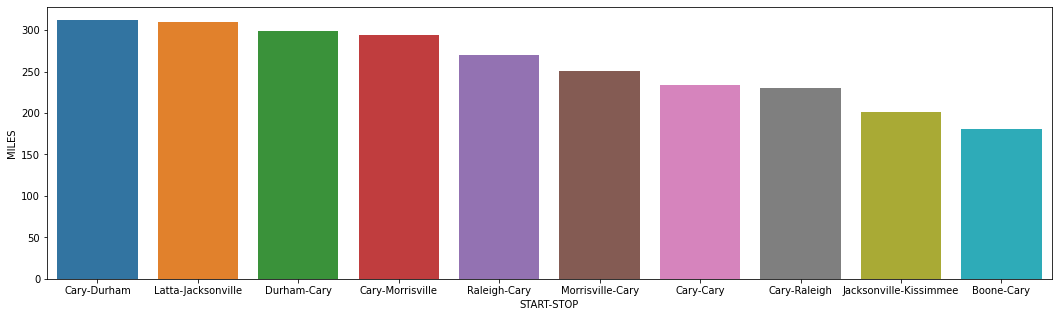

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,5))
sns.barplot(data=top10, x='START-STOP',y='MILES');

<a id = "link4"></a>
## B. Start Date - End Date 
### Manipulating date & time objects
#### Lets explore the variables using the below points-
- busiest month in terms of number of drives and miles driven
- busiest day of the week and preferred start hour 
- peak hours

We will create more features for the trip data to be able to cater to above requests

We will be using the datetime module (  https://docs.python.org/3/library/datetime.html  )

Used "strftime() and strptime() Format Codes" from documentation page

In [63]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  653 non-null    object 
 1   END_DATE    653 non-null    object 
 2   CATEGORY    653 non-null    object 
 3   START       653 non-null    object 
 4   STOP        653 non-null    object 
 5   MILES       653 non-null    float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 35.8+ KB


In [65]:
# Create columns by converting the start and end date into a datatime format
# You can also over write the same column - but for the sake of understanding the difference 
# in formats, we create new columns
from datetime import datetime # Import datetime library

In [66]:
df['start_dt'] = df['START_DATE'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y %H:%M'))
# '%m/%d/%Y %H:%M' - the format of the string that we want to convert into date type
#strptime - Parse a string into a datetime object given a corresponding format

In [67]:
df['end_dt'] = df['END_DATE'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y %H:%M'))

In [68]:
df.head() # Print first 5 rows of data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start_dt,end_dt
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00
1,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00
2,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00
3,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2016-01-06 15:49:00
4,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06 17:15:00,2016-01-06 17:19:00


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  653 non-null    object        
 1   END_DATE    653 non-null    object        
 2   CATEGORY    653 non-null    object        
 3   START       653 non-null    object        
 4   STOP        653 non-null    object        
 5   MILES       653 non-null    float64       
 6   PURPOSE     653 non-null    object        
 7   start_dt    653 non-null    datetime64[ns]
 8   end_dt      653 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 46.0+ KB


In [71]:
df.dtypes

START_DATE            object
END_DATE              object
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
start_dt      datetime64[ns]
end_dt        datetime64[ns]
dtype: object

In [72]:
# Create more columns by using the inbuilt functionalities of datetime module
df['start_day'] = df['start_dt'].dt.day #returns the day from the start_dt date
df['start_hour'] = df['start_dt'].dt.hour #returns the hour from the start_dt date
df['start_month'] = df['start_dt'].dt.month #1- January, 12- December
df['d_of_wk'] = df['start_dt'].dt.dayofweek # Days encoded as 0-6 ( Mon =0, Tue =1,..)

In [73]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start_dt,end_dt,start_day,start_hour,start_month,d_of_wk
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00,1,21,1,4
1,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00,2,20,1,5
2,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00,5,17,1,1
3,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2016-01-06 15:49:00,6,14,1,2
4,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06 17:15:00,2016-01-06 17:19:00,6,17,1,2


In [74]:
df['weekday'] = df['start_dt'].apply(lambda x : datetime.strftime(x,'%a'))
# strftime - Convert object to a string according to a given format
# '%a' - is used for abbreviated name of the day - Mon, Tue...
# '%A' - is used for full name of the day - Monday, Tuesday...

In [75]:
df['month'] = df['start_dt'].apply(lambda x : datetime.strftime(x,'%b'))
# %b - Month as locale’s abbreviated name
# %B - Full name

In [76]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start_dt,end_dt,start_day,start_hour,start_month,d_of_wk,weekday,month
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,2016-01-01 21:17:00,1,21,1,4,Fri,Jan
1,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,2016-01-02 20:38:00,2,20,1,5,Sat,Jan
2,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,2016-01-05 17:45:00,5,17,1,1,Tue,Jan
3,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,2016-01-06 15:49:00,6,14,1,2,Wed,Jan
4,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06 17:15:00,2016-01-06 17:19:00,6,17,1,2,Wed,Jan


**Now let us answer the questions above.**
<br>
<br>
**1. Busiest month in terms of miles**

In [77]:
df.groupby('month').sum()['MILES'].sort_values(ascending = False)

month
Mar    1455.9
Apr    1094.9
Dec     924.4
Feb     727.2
Nov     635.4
Jun     541.0
Jan     500.7
Oct     496.8
Jul     488.3
May     358.5
Aug      88.1
Name: MILES, dtype: float64

**2. Busiest day in terms of number of rides**

In [78]:
# Which day did he get most drives? 
#size it returns the number of elements
# df.groupby(['weekday']).size()
a=df.groupby('weekday').agg({'weekday':['count']}) 
a

,weekday
,count
weekday,
Fri,125
Mon,87
Sat,83
Sun,87
Thu,92
Tue,94
Wed,85


In [79]:
a.columns

MultiIndex([('weekday', 'count')],
           )

In [80]:
a.sort_values([('weekday', 'count')],ascending = False)

,weekday
,count
weekday,
Fri,125
Tue,94
Thu,92
Mon,87
Sun,87
Wed,85
Sat,83


**3. Peak hours (and estiamted preferred time to start) ?**

In [83]:
df.groupby('start_hour').size() # The number of trips started for each hour.

start_hour
0     13
1      4
2      1
3      3
5      3
6      2
7      8
8     17
9     26
10    33
11    39
12    43
13    55
14    52
15    51
16    45
17    51
18    51
19    35
20    45
21    34
22    21
23    21
dtype: int64

In [84]:
df.groupby('start_hour').size().sort_values(ascending = False)

start_hour
13    55
14    52
15    51
18    51
17    51
20    45
16    45
12    43
11    39
19    35
21    34
10    33
9     26
22    21
23    21
8     17
0     13
7      8
1      4
5      3
3      3
6      2
2      1
dtype: int64

## C. Category & Purpose
#### Explore the category and the purpose of the trips through
- Most frequent trip category
- Most frequent trip purpose
- Miles driven per category and purpose
- Percent composition of business miles vs personal miles
- time spent per category and purpose

**1. Most frequent trip category**

In [85]:
df['CATEGORY'].value_counts()

Business    647
Personal      6
Name: CATEGORY, dtype: int64

**2. Most frequent Purpose**

In [86]:
#Purpose
df['PURPOSE'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

**3. How many miles were driven per category and purpose ?**

In [87]:
#per purpose
df.groupby('PURPOSE').sum()['MILES'].sort_values(ascending = False)

PURPOSE
Meeting            2851.3
Customer Visit     2089.5
Meal/Entertain      911.7
Temporary Site      523.7
Errand/Supplies     508.0
Between Offices     197.0
Commute             180.2
Moving               18.2
Airport/Travel       16.5
Charity ($)          15.1
Name: MILES, dtype: float64

In [88]:
#per category
df.groupby('CATEGORY').sum()['MILES'].sort_values(ascending = False)

CATEGORY
Business    7097.7
Personal     213.5
Name: MILES, dtype: float64

**4. How many miles were driven per category and purpose - in percentages ?**

In [121]:
df1 = df.groupby('CATEGORY').agg({'MILES':'sum'})
df1

,MILES
CATEGORY,
Business,7097.7
Personal,213.5


In [122]:
df3 = df1.apply(lambda x: x/x.sum()*100).rename(columns = {'MILES':'% of Miles'})
df3

,% of Miles
CATEGORY,
Business,97.079823
Personal,2.920177


<AxesSubplot:ylabel='% of Miles'>

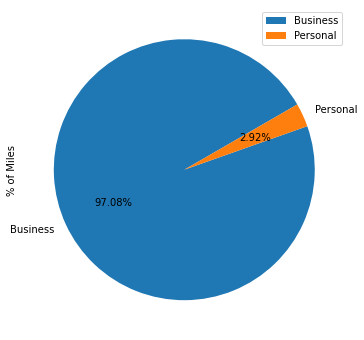

In [123]:
df3.plot(kind='pie', y='% of Miles',figsize=(6,6),startangle=30,autopct='%1.2f%%')

In [124]:
df2 = df.groupby('PURPOSE').agg({'MILES':'sum'})
df2

,MILES
PURPOSE,
Airport/Travel,16.5
Between Offices,197.0
Charity ($),15.1
Commute,180.2
Customer Visit,2089.5
Errand/Supplies,508.0
Meal/Entertain,911.7
Meeting,2851.3
Moving,18.2


In [125]:
df4 =df2.apply(lambda x: x/x.sum()*100).rename(columns = {'MILES':'% of Miles'})
df4

,% of Miles
PURPOSE,
Airport/Travel,0.225681
Between Offices,2.694496
Charity ($),0.206532
Commute,2.464712
Customer Visit,28.579440
Errand/Supplies,6.948244
Meal/Entertain,12.469909
Meeting,38.999070
Moving,0.248933


<AxesSubplot:ylabel='% of Miles'>

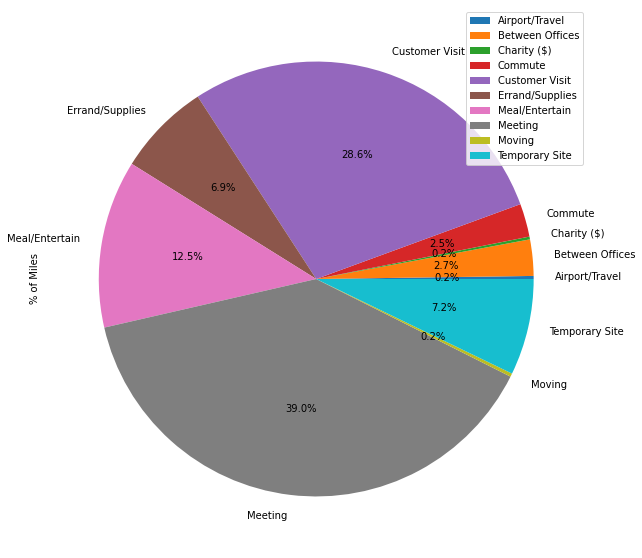

In [131]:
df4.plot(kind='pie', y='% of Miles',figsize=(10,10),autopct='%1.1f%%')